# Discovering rate of infection
### (Infected / total population)

## Code book

### For Covid-19 data

#### Variables and their units

- We have the dataframe df_infected which contains the number of people tested positive on covid-19
- dates (columns): days of the year 2020 from end of January to today with the respective number of infected once
- Countries (index): Names of all Countries that maintain a record of their covid-19 cases
- Continents (column): Names of all Continents excluding Antarctica

#### Summary choices made

- Created seperate df (df_infected) where only the latest date is displayed with additional information of the respective infected once
- Created df for continents by introducing a column and groupby function 

### For Population data

#### Variables and their units

- Our Dataframe called Totalpop contained originally 10 columns
    - LocID (discarded)
    - Location this is the Country name and we will use it to merge this Dataframe with the Covid-19 Dataframe
    - VarID (discarded)
    - Variant has different categorical variables since the Dataframe also contains predicted population sizes, we have chosen Medium since this is the actual value that was measured
    - Time Years from 1950 to 2100 we have chosen 2020.
    - Midperiod is also a part of the Dataframe since the predictions are given for intervalls of 5 years, but since we haven't chosen prediction we also discarded this column
    - PopMale gives the portion of males from the whole population (discarded)
    - PopFemale same as PopMale but for females (discarded)
    - PopTotal this Value is either measured or estimated (absolute #of People)
    - PopDensity this Value is either measured or estimated (in #of People per square km)
    
#### Summary choices made

- We discarded
    - PopMale
    - PopFemale
    - MidPeriod
    - VarID
    - LocID
- We transformed PopTotal by multiplying with 1000, since the number was given in thousands. We did that for simplicity.
- We used the information about total population size and population density per sq./km to create 2 columns in our overview table about the actual covid-19 situation
- We had to align the country names of the covid-19 data and the population data so that we could merge the dataframes together
    - We made a set of country names of both dataframes and then looked for differences, the differences were then corrected manually
- Created column for rate of infection: Infected/PopTotal
- We computed three additional metrics where we took the log of density, PopTotal and rate of infection




In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Data from: https://github.com/CSSEGISandData/COVID-19

In [279]:
#import data
df_infected = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_infected_US = pd.read_csv('./data/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
#add a column called United States to the US datasets so that they are compatible
df_infected_US['Country/Region'] = 'United States'

In [280]:
#statistics for countries (group all regions together)
df_infected = df_infected.groupby('Country/Region').sum() 
#sum over all states in the US
df_infected_US = df_infected_US.groupby('Country/Region').sum()

In [281]:
#take just the most recent day (i.e. data) for analysis
df_infected = df_infected[df_infected.columns[-1]]
df_infected_US = df_infected_US[df_infected_US.columns[-1]]
df_infected = df_infected.append(df_infected_US)

In [282]:
df_infected.loc['Nicaragua']

254

In [283]:
countries = list(df_infected.index)

data from: https://population.un.org/wpp/Download/Standard/CSV/

In [284]:
#import the data of population size
totalpop = pd.read_csv('./csv/Total_Population.csv')

In [285]:
totalpop

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486
5,4,Afghanistan,2,Medium,1955,1955.5,4318.945,3952.047,8270.992,12.669
6,4,Afghanistan,2,Medium,1956,1956.5,4375.800,4023.073,8398.873,12.865
7,4,Afghanistan,2,Medium,1957,1957.5,4437.157,4098.000,8535.157,13.073
8,4,Afghanistan,2,Medium,1958,1958.5,4503.156,4176.941,8680.097,13.295
9,4,Afghanistan,2,Medium,1959,1959.5,4573.914,4260.033,8833.947,13.531


In [286]:
np.ndarray.tolist(totalpop['Time'].unique())

[1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022,
 2023,
 2024,
 2025,
 2026,
 2027,
 2028,
 2029,
 2030,
 2031,
 2032,
 2033,
 2034,
 2035,
 2036,
 2037,
 2038,
 2039,
 2040,
 2041,
 2042,
 2043,
 2044,
 2045,
 2046,
 2047,
 2048,
 2049,
 2050,
 2051,
 2052,
 2053,
 2054,
 2055,
 2056,
 2057,
 2058,
 2059,
 2060,
 2061,
 2062,
 2063,
 2064,
 2065,
 2066,
 2067,
 2068,
 2069,
 2070,
 2071,
 2072,
 2073,
 2074,
 2075,
 2076,
 2077,
 2078,
 2079,
 2080,
 2081,
 2082,
 2083,
 2084,
 2085,
 2086,
 2087,
 2088,
 2089,
 2090,
 2091,
 2092,

In [287]:
np.ndarray.tolist(totalpop['Variant'].unique())

['Medium',
 'High',
 'Low',
 'Constant fertility',
 'Instant replacement',
 'Zero migration',
 'Constant mortality',
 'No change',
 'Momentum',
 'Median PI',
 'Upper 80 PI',
 'Lower 80 PI',
 'Upper 95 PI',
 'Lower 95 PI']

In [288]:
#only rows with
#Time == 2020
#Variant == Medium
totalpop = totalpop.loc[(totalpop['Variant'] == 'Medium') & (totalpop['Time'] == 2020)]
totalpop.drop(['PopMale', 'PopFemale', 'MidPeriod', 'VarID', 'LocID'], axis=1, inplace=True)

In [289]:
totalpop

,Location,Variant,Time,PopTotal,PopDensity
70,Afghanistan,Medium,2020,38928.341,59.627
954,Africa,Medium,2020,1340598.113,45.216
1838,African Group,Medium,2020,1338826.591,45.571
1989,African Union,Medium,2020,1339423.921,45.182
2140,African Union: Central Africa,Medium,2020,158619.638,30.066
2291,African Union: Eastern Africa,Medium,2020,392563.672,61.404
2442,African Union: Northern Africa,Medium,2020,207032.899,29.429
2593,African Union: Southern Africa,Medium,2020,184002.188,31.143
2744,African Union: Western Africa,Medium,2020,397205.524,78.921
2895,"African, Caribbean and Pacific (ACP) Group of ...",Medium,2020,1179679.906,48.849


In [290]:
totalpop = totalpop.loc[totalpop['Location'].isin(countries)]

In [291]:
totalpop.set_index('Location', inplace=True)

In [292]:
df_infected = df_infected.get(list(totalpop.index))

In [293]:
df_infected

Country/Region
Afghanistan                 7653
Albania                      949
Algeria                     7377
Andorra                      761
Angola                        52
Antigua and Barbuda           25
Argentina                   8809
Armenia                     5041
Australia                   7072
Austria                    16321
Azerbaijan                  3518
Bahamas                       96
Bahrain                     7532
Bangladesh                 25121
Barbados                      90
Belarus                    31508
Belgium                    55791
Belize                        18
Benin                        130
Bhutan                        21
Bosnia and Herzegovina      2321
Botswana                      25
Brazil                    271885
Bulgaria                    2259
Burkina Faso                 796
Burundi                       42
Cabo Verde                   335
Cambodia                     122
Cameroon                    3529
Canada                     8

In [294]:
totalpop

,Variant,Time,PopTotal,PopDensity
Location,,,,
Afghanistan,Medium,2020,38928.341,59.627
Albania,Medium,2020,2877.800,105.029
Algeria,Medium,2020,43851.043,18.411
Andorra,Medium,2020,77.265,164.394
Angola,Medium,2020,32866.268,26.363
Antigua and Barbuda,Medium,2020,97.928,222.564
Argentina,Medium,2020,45195.777,16.515
Armenia,Medium,2020,2963.234,104.083
Australia,Medium,2020,25499.881,3.319


In [295]:
totalpop['Infected'] = df_infected

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [296]:
totalpop

,Variant,Time,PopTotal,PopDensity,Infected
Location,,,,,
Afghanistan,Medium,2020,38928.341,59.627,7653
Albania,Medium,2020,2877.800,105.029,949
Algeria,Medium,2020,43851.043,18.411,7377
Andorra,Medium,2020,77.265,164.394,761
Angola,Medium,2020,32866.268,26.363,52
Antigua and Barbuda,Medium,2020,97.928,222.564,25
Argentina,Medium,2020,45195.777,16.515,8809
Armenia,Medium,2020,2963.234,104.083,5041
Australia,Medium,2020,25499.881,3.319,7072


In [297]:
Population_Total = totalpop['PopTotal'] * 1000
totalpop['PopTotal'] = Population_Total

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



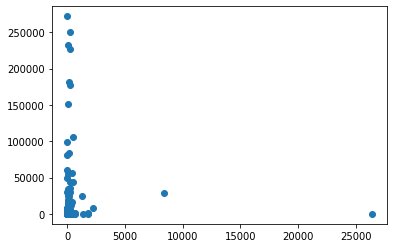

In [298]:
#Population Density vs Number of Infected
plt.scatter(totalpop['PopDensity'], totalpop['Infected'])

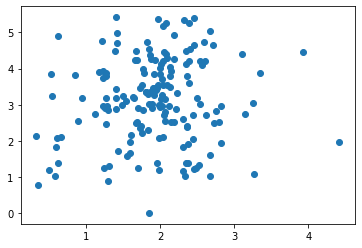

In [299]:
plt.scatter(np.log10(totalpop['PopDensity']), np.log10(totalpop['Infected']))

In [300]:
#adding a column to our data frame which is rate of infection
totalpop['rateofinfection'] = totalpop['Infected']/totalpop['PopTotal']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [301]:
totalpop

,Variant,Time,PopTotal,PopDensity,Infected,rateofinfection
Location,,,,,,
Afghanistan,Medium,2020,38928341.0,59.627,7653,0.000197
Albania,Medium,2020,2877800.0,105.029,949,0.000330
Algeria,Medium,2020,43851043.0,18.411,7377,0.000168
Andorra,Medium,2020,77265.0,164.394,761,0.009849
Angola,Medium,2020,32866268.0,26.363,52,0.000002
Antigua and Barbuda,Medium,2020,97928.0,222.564,25,0.000255
Argentina,Medium,2020,45195777.0,16.515,8809,0.000195
Armenia,Medium,2020,2963234.0,104.083,5041,0.001701
Australia,Medium,2020,25499881.0,3.319,7072,0.000277


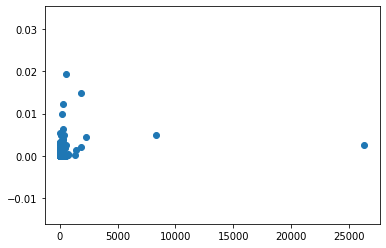

In [302]:
plt.scatter(totalpop['PopDensity'], totalpop['rateofinfection'])

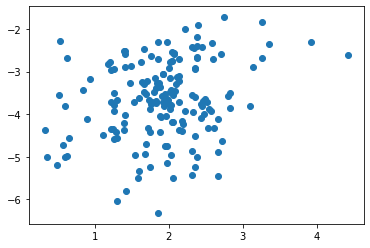

In [303]:
#scatterplot showing the relation between Populationdensity and infection rate
plt.scatter(np.log10(totalpop['PopDensity']), np.log10(totalpop['rateofinfection']))

In [304]:
totalpop['log10_Population_Density'] = np.log10(totalpop['PopDensity'])
totalpop['log10_rate_of_infection'] = np.log10(totalpop['rateofinfection'])
totalpop['log10_Infected'] = np.log10(totalpop['Infected'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [305]:
import statsmodels.formula.api as sm
reg = sm.ols(formula='log10_rate_of_infection ~ log10_Population_Density',data=totalpop).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     log10_rate_of_infection   R-squared:                       0.066
Model:                                 OLS   Adj. R-squared:                  0.060
Method:                      Least Squares   F-statistic:                     11.58
Date:                     Wed, 20 May 2020   Prob (F-statistic):           0.000838
Time:                             15:46:48   Log-Likelihood:                -217.03
No. Observations:                      167   AIC:                             438.1
Df Residuals:                          165   BIC:                             444.3
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -4.3615      0.216    -20.197      0.000      -4.788      -3.935
log10_Population_Density     0.3637      0.107      3.403      0.001       0.153       0.575
==============================================================================
Omnibus:                        3.910   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                3.978
Skew:                          -0.360   Prob(JB):                        0.137
Kurtosis:                       2.770   Cond. No.                         7.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

slope:	 0.36374953838263413
inter:	 -4.361528822791384
r2 val:	 0.0655640401010773


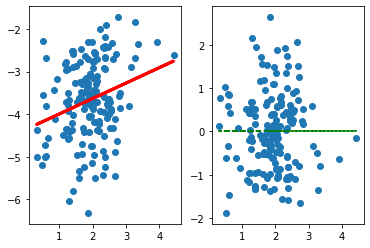

In [306]:
x = totalpop['log10_Population_Density']
y = totalpop['log10_rate_of_infection']

# read out the fitting parameters
inter, s = reg.params
line = s * x + inter
print('slope:\t', s)
print('inter:\t', inter)
print('r2 val:\t', reg.rsquared)

# plotting and comparison
f, (ax0, ax1) = plt.subplots(1, 2)
ax0.scatter(x, y)
ax0.plot(x, line, lw=3, color='red')

# plot the residuals
ax1.scatter(x, line-y)
ax1.plot(x, np.zeros_like(x), 'g--')

In [307]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
import pycountry_convert as pc

In [308]:
#Jupyter setup (to display in notebook)
init_notebook_mode(connected=True)

In [309]:
countries = np.asarray(list(totalpop.index))
# Continent_code to Continent_names as a dictionary
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defining Function for getting continent code for country by using the pc library
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting continent Information, insert at position 1, with column name 'continent'
totalpop.insert(1,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])

In [310]:
totalpop.loc[totalpop['continent']=='Others']
totalpop.loc[totalpop.index=='Timor-Leste', 'continent'] = 'Asia'
totalpop.loc[totalpop.index=='Holy See', 'continent'] = 'Europe'
totalpop.loc[totalpop.index=='Western Sahara', 'continent'] = 'Africa'
totalpop


,Variant,continent,Time,PopTotal,PopDensity,Infected,rateofinfection,log10_Population_Density,log10_rate_of_infection,log10_Infected
Location,,,,,,,,,,
Afghanistan,Medium,Asia,2020,38928341.0,59.627,7653,0.000197,1.775443,-3.706434,3.883832
Albania,Medium,Europe,2020,2877800.0,105.029,949,0.000330,2.021309,-3.481794,2.977266
Algeria,Medium,Africa,2020,43851043.0,18.411,7377,0.000168,1.265077,-3.774100,3.867880
Andorra,Medium,Europe,2020,77265.0,164.394,761,0.009849,2.215886,-2.006598,2.881385
Angola,Medium,Africa,2020,32866268.0,26.363,52,0.000002,1.420995,-5.800747,1.716003
Antigua and Barbuda,Medium,North America,2020,97928.0,222.564,25,0.000255,2.347455,-3.592967,1.397940
Argentina,Medium,South America,2020,45195777.0,16.515,8809,0.000195,1.217879,-3.710171,3.944927
Armenia,Medium,Asia,2020,2963234.0,104.083,5041,0.001701,2.017380,-2.769249,3.702517
Australia,Medium,Australia,2020,25499881.0,3.319,7072,0.000277,0.521007,-3.556996,3.849542


In [313]:
fig = px.scatter(totalpop,
    x = 'log10_Population_Density',
    y = 'log10_rate_of_infection',
    hover_name=countries,
    color='continent',
    title='Population density vs. rate of infection')
fig.update_layout(
    xaxis_title="Population density (log10)",
    yaxis_title="rate of infection (log10)"
    )
fig.show()

In [314]:
fig = px.scatter(totalpop,
    x = 'log10_Population_Density',
    y = 'log10_Infected',
    hover_name=countries,
    color='continent',
    title='Population density vs. death rate')
fig.update_layout(
    xaxis_title="Population density (log10)",
    yaxis_title="death rate (log10)"
    )
fig.show()